In [ ]:
#@title Welcome! I thank you for wanting to try out this code. The first step is to press the arrow on the left to import the libraries. To speed up the process, run all the code at once by clicking 'Runtime' and then 'Run all'.
import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv).
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import spacy
import wordcloud
import os # Good for navigating your computer's files
import sys

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from spacy.lang.en.stop_words import STOP_WORDS
nltk.download('wordnet')
nltk.download('punkt')

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
!python -m spacy download en_core_web_lg

#import en_core_web_md
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


#!pip install -U spacy

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 2.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
#@title Next, we want to allow the computer to read data from google drive. This is crucial because the dataset is located in drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title This code creates a path to the dataset file. Make sure to upload the dataset as a csv file to drive in order to use this method.

cs= "/content/drive/MyDrive/2labor.csv"

In [ ]:
#@title This code converts the dataset file, which currently is in the form of a google spreadsheet, to a file that is ready for the code.

labor = pd.read_csv(cs)
labor=labor[['labor_trafficking', 'text']]

In [ ]:
#@title The dataset is now embedded into Google Colaboratory in a readable format. Now we can use the dataset to make our trafficking detection tool
labor

,labor_trafficking,text
0,1,Metro Manila The Department of Justice (DOJ) h...
1,1,"This week, a court indictment was unsealed rev..."
2,1,A San Francisco couple have been charged with ...
3,1,A 52-year-old woman accused of forcing six mig...
4,1,"Defendants Nesly Mwarecheong, 46, and Bertino ..."
5,1,"ATLANTA- Bidemi Bello, 42, formerly of Suwanee..."
6,1,"A federal jury in sitting in Richmond, Virgini..."
7,1,A federal grand jury in the Central District o...
8,0,Weeks after Charlotte Hultquist got Covid-19 i...
9,0,"Grant Wahl, a longtime soccer sportswriter, di..."


In [ ]:
#@title This code remove unnecessary words from the dataset like 'the', 'I' and 'with'.
import string
string.punctuation
import nltk
nltk.download('stopwords')
stopword= nltk.corpus.stopwords.words('english')
ps=nltk.PorterStemmer()
nltk.download('punkt')
import re
import string


def remove_punct(text):
  text_nopunct= "".join([char for char in text if char not in string.punctuation])
  return text_nopunct
labor['text_clean']=labor['text'].apply(lambda X_data: remove_punct(X_data))

X_data=labor['text_clean']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
#@title The following code separates each row of text under the 'text' column into separate words, and turns the words into numbers that the algorithm understands.

y_data = labor['labor_trafficking']

#'''
text_to_nlp = spacy.load("en_core_web_lg")
# Pre-processing
def tokenize_vecs(text):
    clean_tokens = []
    for token in text_to_nlp(text):
        if (not token.is_stop) & (token.lemma_ != '-PRON-') & (not token.is_punct):
            clean_tokens.append(token)
    return clean_tokens

# Calculate mean word vectors
X_spacy = []
for text in X_data:
    review = tokenize_vecs(text)  # Returns cleaned list of spaCy tokens
    if len(review) > 0:  # Avoid division by zero
        review_vec = np.mean([word.vector for word in review if word.has_vector], axis=0)
        X_spacy.append(review_vec)
    else:
        # Handle case where review is empty (e.g., assign zero vector or skip)
        X_spacy.append(np.zeros(text_to_nlp.vocab.vectors_length))

X_spacy = np.array(X_spacy)
print(X_spacy)
#'''



[[-0.4646943  -0.3069881  -0.7937927  ... -1.1282463  -0.05977658
   1.1351215 ]
 [-1.6290896  -0.8610314  -1.6562097  ... -1.6579491  -0.21883789
   1.1599557 ]
 [-1.3117603  -0.5183042  -1.692666   ... -1.3070608  -0.431384
   0.8597607 ]
 ...
 [-0.31315136  0.40327182 -0.94606227 ... -1.4898802  -1.0969192
   2.153309  ]
 [-0.7965023  -0.0979527  -1.8168032  ... -0.63609093 -0.8431716
   1.0148078 ]
 [-0.5720013   0.34142002 -1.5801555  ... -0.79882157 -0.98178923
   1.4049509 ]]


In [ ]:
X_spacy

array([[-0.4646943 , -0.3069881 , -0.7937927 , ..., -1.1282463 ,
        -0.05977658,  1.1351215 ],
       [-1.6290896 , -0.8610314 , -1.6562097 , ..., -1.6579491 ,
        -0.21883789,  1.1599557 ],
       [-1.3117603 , -0.5183042 , -1.692666  , ..., -1.3070608 ,
        -0.431384  ,  0.8597607 ],
       ...,
       [-0.31315136,  0.40327182, -0.94606227, ..., -1.4898802 ,
        -1.0969192 ,  2.153309  ],
       [-0.7965023 , -0.0979527 , -1.8168032 , ..., -0.63609093,
        -0.8431716 ,  1.0148078 ],
       [-0.5720013 ,  0.34142002, -1.5801555 , ..., -0.79882157,
        -0.98178923,  1.4049509 ]], dtype=float32)

In [ ]:

#@title Next, we set up the logistic regresiion classifer and test it for accuracy


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_spacy, y_data, test_size=0.2, random_state=46)

# Instantiate a logistic regression model
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_model.predict(X_test)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))



Accuracy: 0.90
Precision: 0.86
Recall: 1.00
F1 Score: 0.92


In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Instantiate a logistic regression model
#lr_model = LogisticRegression()

# Set up stratified k-fold cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=46)

# Cross-validate and get predicted labels for each fold
y_pred = cross_val_predict(lr_model, X_spacy, y_data, cv=skf)

# Evaluate the performance of the model across all folds
accuracy = accuracy_score(y_data, y_pred)
precision = precision_score(y_data, y_pred)
recall = recall_score(y_data, y_pred)
f1 = f1_score(y_data, y_pred)

print("Cross-validated Accuracy: {:.2f}".format(accuracy))
print("Cross-validated Precision: {:.2f}".format(precision))
print("Cross-validated Recall: {:.2f}".format(recall))
print("Cross-validated F1 Score: {:.2f}".format(f1))

Cross-validated Accuracy: 0.94
Cross-validated Precision: 0.92
Cross-validated Recall: 0.96
Cross-validated F1 Score: 0.94


In [ ]:
#Aug 23

from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_data, y_pred)

# Extracting TP, TN, FP, FN from the confusion matrix
TN, FP, FN, TP = cm.ravel()

# Calculate the FP and FN rates
FP_rate = FP / (FP + TN)  # False Positive Rate
FN_rate = FN / (FN + TP)  # False Negative Rate

print("False Positive Rate: {:.2f}".format(FP_rate))
print("False Negative Rate: {:.2f}".format(FN_rate))

False Positive Rate: 0.08
False Negative Rate: 0.04


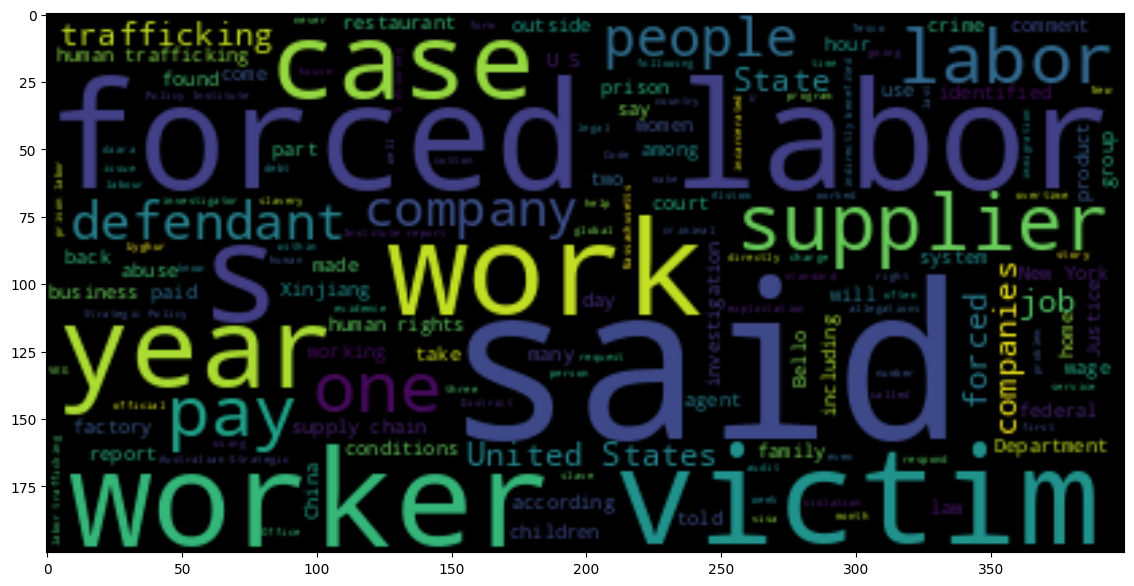

In [ ]:
#word cloud to see prevalence of words under 0= no labor trafficking and 1= labor trafficking
#@title This word cloud helps us visualise the most common words in the portion of our dataset that indicated trafficking
num_labor_trafficking =  1#@param {type:"integer"}
this_labor_trafficking_text = ''
for t in labor[labor['labor_trafficking'] == num_labor_trafficking]['text'].values: # form field cell
    this_labor_trafficking_text += t + ' '

wordcloud = WordCloud()
wordcloud.generate_from_text(this_labor_trafficking_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')

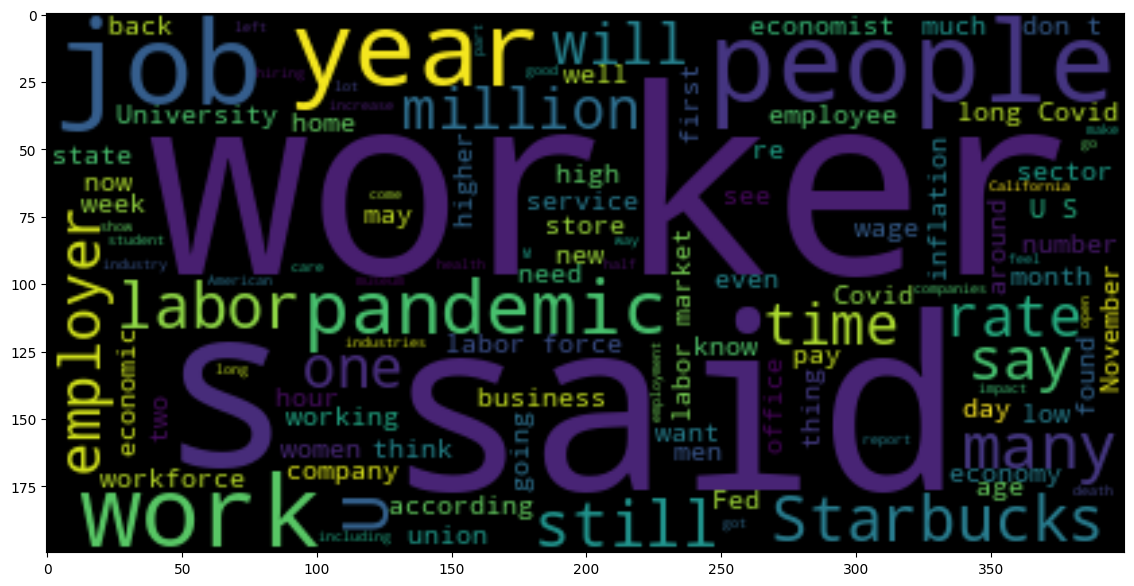

In [ ]:
#word cloud to see prevalence of words under 0= no labor trafficking and 1= labor trafficking
#@title This word cloud helps us visualise the most common words in the portion of our dataset that DID NOT indicate trafficking
num_labor_trafficking =  0#@param {type:"integer"}
this_labor_trafficking_text = ''
for t in labor[labor['labor_trafficking'] == num_labor_trafficking]['text'].values: # form field cell
    this_labor_trafficking_text += t + ' '

wordcloud = WordCloud()
wordcloud.generate_from_text(this_labor_trafficking_text)
plt.figure(figsize=(14,7))
plt.imshow(wordcloud, interpolation='bilinear')

In [ ]:
#@title This section tests the algorithm. Next to "example_review", there is already some text to test the algorithm. The trafficking tool correctly identifies the scenario from the HTS site about migrant labor as a trafficking case. Feel free to replace the text with something of your choosing! There are four links below which contain articles you can copy into example_review if you would like. Press 'show code' to look at those details.
# Define a function to generate a document vector from a list of tokens
def get_doc_vector(tokens):
    vectors = [text_to_nlp(token).vector for token in tokens if text_to_nlp(token).has_vector]
    if not vectors:
        return np.zeros(49)
    return np.mean(vectors, axis=0)

# Get the vector representation of the example review text
example_text = "Among the belongings Luis packed for his trip from Mexico to Atlanta was a business suit.  A mechanical engineer by training, Luis had spent the bulk of his career since his 2012 college graduation working in the auto industry in his native Aguascalientes. He had just accepted a quality engineering role based in West Point, Georgia, and was hopeful the international work experience could unlock even better opportunities down the line.  But things began falling apart almost as soon as he landed at Hartsfield-Jackson International Airport, on a cold night in December 2020. A man sent by Luis’ new employer greeted him with a strange revelation: the engineering job he had been hired to do – and which he uprooted his life in Mexico to take – did not exist.  For the next 11 months, Luis would put in 12-hour shifts on the factory floor of a Georgia auto parts manufacturer, where he carried heavy loads to keep the assembly line fed. The nature of the work — which involved lugging parts such as bumpers or transmissions weighing over 100 pounds — put strain on his back, his hands, his feet." #@param {type:'string'}
doc_vector = get_doc_vector(example_text.split())
#A hate crime article that DOES NOT indicate trafficking: https://www.usnews.com/news/us/articles/2022-12-30/man-faces-california-hate-crime-charge-after-anti-asian-rant
#The defendants in the case in the article below were later prosecuted. This tool correctly predicted that the case indicated trafficking from the case details provided in the link below.
#https://www.chicoer.com/2016/11/17/california-pair-charged-with-bringing-forced-laborers-to-us/
#migrant labor example_text: https://humantraffickingsearch.org/resource/a-total-lie-mexican-engineers-say-they-were-misled-into-manual-labor-in-ga-factories/

prediction = lr_model.predict(np.array([doc_vector]))

if prediction:
    print("This indicated trafficking")
else:
    print("This did not indicate trafficking")

This did not indicate trafficking


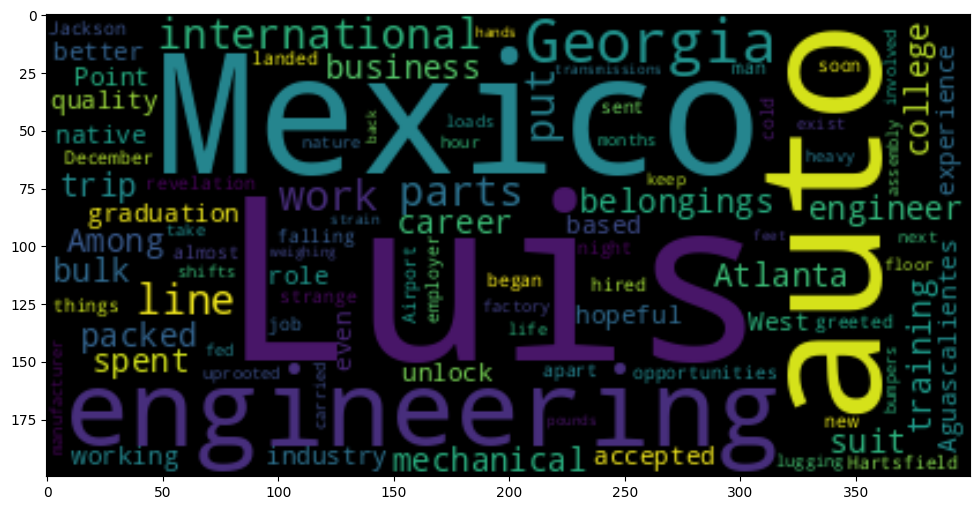

In [ ]:
#word cloud to see prevalence of words under 0= no labor trafficking and 1= labor trafficking
#@title This word cloud helps us visualise the most common words from the inputted text
wordcloud_text =  "Among the belongings Luis packed for his trip from Mexico to Atlanta was a business suit.  A mechanical engineer by training, Luis had spent the bulk of his career since his 2012 college graduation working in the auto industry in his native Aguascalientes. He had just accepted a quality engineering role based in West Point, Georgia, and was hopeful the international work experience could unlock even better opportunities down the line.  But things began falling apart almost as soon as he landed at Hartsfield-Jackson International Airport, on a cold night in December 2020. A man sent by Luis\u2019 new employer greeted him with a strange revelation: the engineering job he had been hired to do \u2013 and which he uprooted his life in Mexico to take \u2013 did not exist.  For the next 11 months, Luis would put in 12-hour shifts on the factory floor of a Georgia auto parts manufacturer, where he carried heavy loads to keep the assembly line fed. The nature of the work \u2014 which involved lugging parts such as bumpers or transmissions weighing over 100 pounds \u2014 put strain on his back, his hands, his feet." #@param {type:'string'}
this_labor_trafficking_text = wordcloud_text

wordcloud = WordCloud()
wordcloud.generate_from_text(this_labor_trafficking_text)
plt.figure(figsize=(14,6))
plt.imshow(wordcloud, interpolation='bilinear')